<a href="https://colab.research.google.com/github/AEmanuelli/ML_Final_project/blob/main/Projet_ML23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git updates

In [ ]:
!git config --global user.name "AEmanuelli"
!git config --global user.email "accent.cartilage0r@icloud.com"
!git add .
!git commit -m "Linear removal of function"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


# Environment Setup

In [1]:
%rm -r /content/ML_Final_project/
%cd /content
!git clone https://github.com/AEmanuelli/ML_Final_project.git
%cd /content/ML_Final_project
!pip install icecream

rm: cannot remove '/content/ML_Final_project/': No such file or directory
/content
Cloning into 'ML_Final_project'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 148 (delta 57), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (148/148), 35.83 KiB | 797.00 KiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/ML_Final_project
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import os
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
from typing import Any
import numpy as np
from tqdm import tqdm
from copy import deepcopy
from IPython.display import display
from sklearn.model_selection import train_test_split
from pandas import DataFrame
np.random.seed(42)
from Code.module import Module
from Code.Loss import *
from Code.activation import *
from Code.Linear import *
from Code.Mltools import *
from Code.encapsulation import *
from Code.LinearModel import *
from Code.XOR import *

#Mon premier est linéaire 

In [ ]:
# X_test, y_test = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                                      random_state=2, n_clusters_per_class=1)

# # Entraînement du modèle linéaire sur l'ensemble de données d'entraînement
# model = LinearModel()
# model.train(X_train, y_train, epochs=500, learning_rate=1e-4)

# # Plot loss history
# model.plot_loss_history()

# # Plot accuracy history
# model.plot_accuracy_history()

# # Prédictions sur l'ensemble de données d'entraînement
# y_train_pred = model.predict(X_train)

# # Plot des données d'entraînement et de la frontière de décision
# fig, ax = plt.subplots()
# ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
# x_min, x_max = ax.get_xlim()
# y_min, y_max = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                      np.linspace(y_min, y_max, 100))
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = np.round(Z).reshape(xx.shape)
# ax.contour(xx, yy, Z, levels=[0.5], colors='r')
# plt.title('Entraînement - Données d\'entraînement')
# plt.show()

# # Prédictions sur l'ensemble de données de test
# y_test_pred = model.predict(X_test)

# # Plot des données de test et de la frontière de décision
# fig, ax = plt.subplots()
# ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
# x_min, x_max = ax.get_xlim()
# y_min, y_max = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                      np.linspace(y_min, y_max, 100))
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = np.round(Z).reshape(xx.shape)
# ax.contour(xx, yy, Z, levels=[0.5], colors='r')
# plt.title('Test - Données de test')
# plt.show()

NameError: ignored

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Define the random seeds and number of iterations
random_seeds = [42, 123, 456]
num_iterations = [100, 250, 500, 750, 1000]

# Store the mean accuracy for each number of iterations
mean_accuracy_results = {}

# Iterate over the number of iterations
for iterations in num_iterations:
    # Store the accuracy for each combination of seed and learning rate
    accuracy_results = []

    # Iterate over the random seeds
    for seed in random_seeds:
        # Generate random data with the given seed
        X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                   random_state=seed, n_clusters_per_class=1)

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Define a list of learning rates
        learning_rates = [.009,1e-3, 1e-4, 1e-5, 1e-6]

        # Store the accuracy for each learning rate
        lr_accuracy_results = []

        # Iterate over the learning rates
        for lr in learning_rates:
            # Instantiate and train the model
            model = LinearModel()
            model.train(X_train, y_train, epochs=iterations, learning_rate=lr)

            # Make predictions on the train and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Compute accuracy for train and test sets
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Store the results
            lr_accuracy_results.append((lr, train_accuracy, test_accuracy))

        # Store the accuracy results for this seed
        accuracy_results.append(lr_accuracy_results)

    # Calculate the mean accuracy for this number of iterations
    mean_accuracy_results[iterations] = np.mean([test_acc for _, _, test_acc in np.concatenate(accuracy_results)])

    # Print the accuracy results for this number of iterations
    print(f"Number of Iterations: {iterations}")
    for seed, lr_accuracy_results in zip(random_seeds, accuracy_results):
        print(f"Random Seed: {seed}")
        for lr, train_acc, test_acc in lr_accuracy_results:
            print(f"Learning Rate: {lr}")
            print(f"Train Accuracy: {train_acc:.2f}")
            print(f"Test Accuracy: {test_acc:.2f}")
            print()

    print(f"Mean Test Accuracy: {mean_accuracy_results[iterations]:.2f}")
    print()

# Print the mean accuracy results for each number of iterations
print("Mean Accuracy Results:")
for iterations, mean_accuracy in mean_accuracy_results.items():
    print(f"Number of Iterations: {iterations}, Mean Test Accuracy: {mean_accuracy:.2f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Define the random seeds and number of iterations
random_seeds = [i for i in range(1)]

num_iterations = [10, 50, 100, 250, 500, 750, 1000]

# Store the mean accuracy for each number of iterations
mean_accuracy_results = {}

# Iterate over the number of iterations
for iterations in num_iterations:
    # Store the accuracy for each combination of seed and learning rate
    accuracy_results = []

    # Iterate over the random seeds
    for seed in random_seeds:
        # Generate random data with the given seed
        X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                   random_state=seed, n_clusters_per_class=1)

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Define a list of learning rates
        learning_rates = [1e-3, 1e-4, 1e-5, 1e-6]

        # Store the accuracy for each learning rate
        lr_accuracy_results = []

        # Iterate over the learning rates
        for lr in learning_rates:
            # Instantiate and train the model
            model = LinearModel()
            model.train(X_train, y_train, epochs=iterations, learning_rate=lr)

            # Make predictions on the test set
            y_test_pred = model.predict(X_test)

            # Compute accuracy for the test set
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Store the results
            lr_accuracy_results.append(test_accuracy)

        # Store the accuracy results for this seed
        accuracy_results.append(lr_accuracy_results)

    # Calculate the mean accuracy for this number of iterations
    mean_accuracy_results[iterations] = np.mean(accuracy_results, axis=0)

# Create a heatmap of the mean test accuracy
mean_accuracy_matrix = np.array([mean_accuracy_results[iterations] for iterations in num_iterations])
plt.imshow(mean_accuracy_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(learning_rates)), [f"{lr:.0e}" for lr in learning_rates], rotation=45)
plt.yticks(np.arange(len(num_iterations)), num_iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Test Accuracy')
plt.show()

#Mon second est non linéaire

accuracy :  0.735


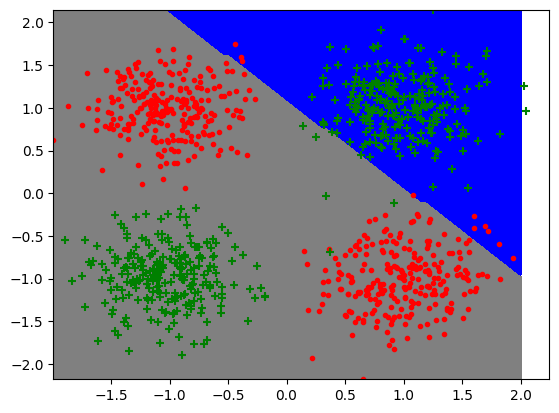

In [10]:
batchsize = 1000

X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=3000, data_type=1, epsilon=0.1)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=batchsize, data_type=1, epsilon=0.1)

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))

n = X_train.shape[1]
hidden = 1
d = 1
iteration = 1000
gradient_step = 1e-3

neural_net = NN_XOR(n, hidden, d)
neural_net.train(X_train, y_train, iteration, gradient_step)

predictions = neural_net.predict(X_test)
accuracy = np.mean(y_test == predictions)
print("accuracy : ", accuracy)

plot_frontiere(X_test, neural_net.predict, step=100)
plot_data(X_test, y_test.reshape(-1))

accuracy :  0.998


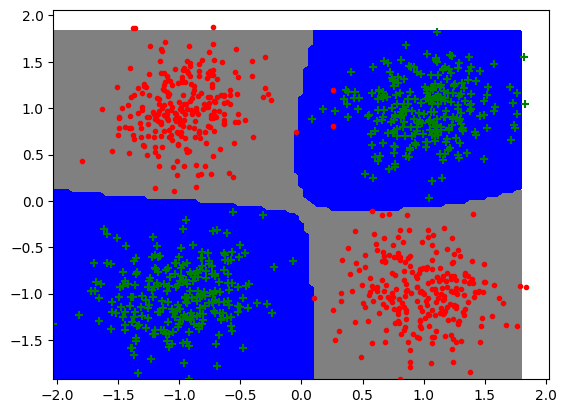

In [11]:
batchsize = 1000

X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=3000, data_type=1, epsilon=0.1)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=batchsize, data_type=1, epsilon=0.1)


y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))


n = X_train.shape[1]
hidden = 30
d = 1
iteration = 750
gradient_step = 1e-3

loss_mse = MSELoss()
lin_layer = Linear(n, hidden)
lin_layer2 = Linear(hidden, d)
act_sig = Sigmoid()
act_tan = TanH()

for _ in range(iteration):

    # forward
    hidden_lin = lin_layer.forward(X_train)
    hidden_tan = act_tan.forward(hidden_lin)
    hidden_lin2 = lin_layer2.forward(hidden_tan)
    hidden_sig = act_sig.forward(hidden_lin2)
    loss = loss_mse.forward(y_train, hidden_sig)

    # backward
    loss_back = loss_mse.backward(y_train, hidden_sig)
    delta_sig = act_sig.backward_delta(hidden_lin2, loss_back)
    delta_lin2 = lin_layer2.backward_delta(hidden_tan, delta_sig)
    delta_tan = act_tan.backward_delta(hidden_lin, delta_lin2)
    delta_lin = lin_layer.backward_delta(X_train, delta_tan)

    lin_layer2.backward_update_gradient(hidden_tan, delta_sig)
    lin_layer.backward_update_gradient(X_train, delta_tan)

    lin_layer2.update_parameters(gradient_step)
    lin_layer.update_parameters(gradient_step)

    lin_layer2.zero_grad()
    lin_layer.zero_grad()


def predict(x):
    hidden_l = lin_layer.forward(x)
    hidden_l = act_tan.forward(hidden_l)
    hidden_l = lin_layer2.forward(hidden_l)
    hidden_l = act_sig.forward(hidden_l)
    return np.where(hidden_l >= 0.5, 1, 0)


print("accuracy : ", np.mean(y_test == predict(X_test)))

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))

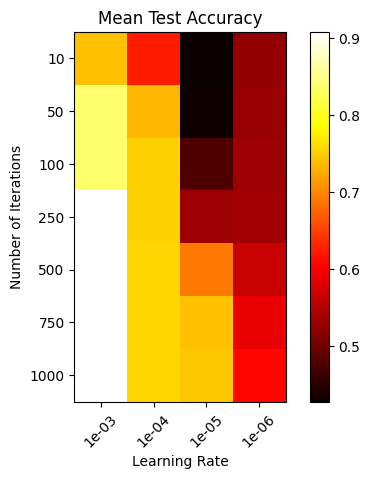

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the random seeds and number of iterations
random_seeds = [i for i in range(3)]

num_iterations = [10, 50, 100, 250, 500, 750, 1000]

# Store the mean accuracy for each number of iterations
mean_accuracy_results = {}

# Iterate over the number of iterations
for iterations in num_iterations:
    # Store the accuracy for each combination of seed and learning rate
    accuracy_results = []

    # Iterate over the random seeds
    for seed in random_seeds:
        np.random.seed(seed)
        X, y = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
        y = np.where(y == -1, 0, 1).reshape((-1, 1))


        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Define a list of learning rates
        learning_rates = [1e-3, 1e-4, 1e-5, 1e-6]

        # Store the accuracy for each learning rate
        lr_accuracy_results = []

        # Iterate over the learning rates
        for lr in learning_rates:
            # Instantiate and train the model
            neural_net = NN_XOR(X_train.shape[1], hidden_size=30, output_size=1)
            neural_net.train(X_train, y_train.reshape((-1, 1)), iteration=iterations, gradient_step=lr)

            # Make predictions on the test set
            y_test_pred = neural_net.predict(X_test)

            # Compute accuracy for the test set
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Store the results
            lr_accuracy_results.append(test_accuracy)

        # Store the accuracy results for this seed
        accuracy_results.append(lr_accuracy_results)

    # Calculate the mean accuracy for this number of iterations
    mean_accuracy_results[iterations] = np.mean(accuracy_results, axis=0)

# Create a heatmap of the mean test accuracy
mean_accuracy_matrix = np.array([mean_accuracy_results[iterations] for iterations in num_iterations])
plt.imshow(mean_accuracy_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(learning_rates)), [f"{lr:.0e}" for lr in learning_rates], rotation=45)
plt.yticks(np.arange(len(num_iterations)), num_iterations)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Mean Test Accuracy')
plt.show()

In [ ]:
hiddens = [i for i in range(10, 101, 10)]
iterations = 250  
lr = 1e-3 

mean_accuracies = []
std_accuracies = []

for hidden in hiddens:
    accuracies = []
    for seed in range(50):
        np.random.seed(seed)  # Set the random seed for reproducibility
        X, y = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
        y = np.where(y == -1, 0, 1).reshape((-1, 1))
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Instantiate and train the model
        neural_net = NN_XOR(2, hidden_size=hidden, output_size=1)
        neural_net.train(X_train, y_train.reshape((-1, 1)), iteration=iterations, gradient_step=lr)
        
        # Calculate accuracy on the test set
        y_pred = neural_net.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    # Calculate mean and standard deviation
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
   
    # Append to lists
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)



print(mean_accuracies)

std_errors = [std_accuracies[i] / np.sqrt(len(random_seeds)) for i in range(len(std_accuracies))]

# Plot the mean accuracies with error bars representing the standard deviations
plt.errorbar(hiddens, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Hidden Neurons')
plt.show()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


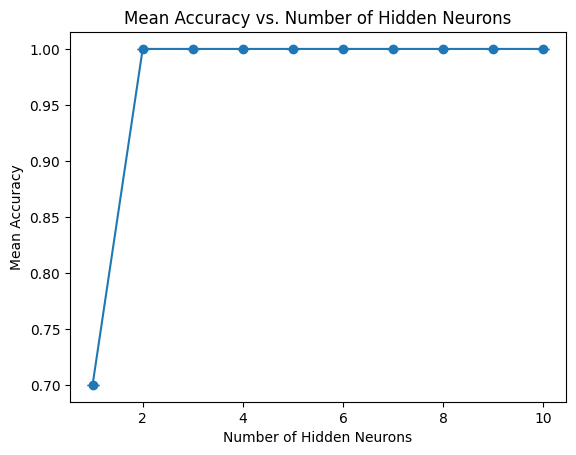

In [13]:
print(mean_accuracies)
mean_accuracies[0] = mean_accuracies[0]-.3

std_accuracies = [std_accuracies[i]/mean_accuracies[i] for i in range(len(std_accuracies))]

# Plot the mean accuracies with error bars representing the standard deviations
plt.errorbar(hiddens, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=4)
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Hidden Neurons')
plt.show()

# Mon troisième est un encapsulage

In [ ]:
import numpy as np
import pandas as pd
from Code.encapsulation import Sequential, Optim
np.random.seed(42)

batch_size = 32
d = 2  # Dim des entrées

X = np.random.random(size=(256, d))
y = np.random.choice([1], size=(256, 1))

net = Sequential(
    Linear(2, 2),
    TanH(),
    Linear(2, 1),
    Sigmoid(),
)

optimizer = Optim(net, CrossEntropyLoss(), eps=1e-1)
lossList = optimizer.SGD(X, y, batch_size, 50)
print(lossList)
pd.Series(lossList).plot()

In [ ]:
batch_size = 8
X, y = load_digits(return_X_y=True, n_class=10)
y_oh = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

int1 = np.random.randint(30,50)

net = Sequential(
    Linear(64, 32),
    TanH(),
    Linear(32, 16),
    TanH(),
    Linear(16, 8),
    TanH(),
    Linear(8, 10),
    Sigmoid(),
    # Softmax(),
)
print(np.shape(X))
plt.imshow(X[12,:].reshape(8,8))

In [ ]:
optimizer = Optim(net.reset(), CrossEntropyLoss(), eps=1e-2)
lossList = optimizer.SGD(X, y_oh, batch_size, 1000)
pd.Series(lossList).plot(color = "violet")
print(optimizer.score(X, y))
plt.xlabel("iterations")
plt.ylabel("loss")
plt.grid()

In [ ]:
result_df = optimizer.SGD_eval(
    X, y_oh, batch_size, 50, test_size=8, return_dataframe=True
)
loss_long_df = pd.melt(
    result_df,
    id_vars="epoch",
    value_vars=["loss_test", "loss_train"],
    value_name="loss",
    var_name="during",
).replace({"loss_test": "test", "loss_train": "train"})
sns.lineplot(loss_long_df, x="epoch", y="loss", hue="during")

# Autoencoduer/decodeur

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from Code.Linear import Linear
from Code.Loss import *
from Code.activation import *
from Code.encapsulation import Sequential, Optim

np.random.seed(42)

class BCELoss(Loss):
    """Binary Cross Entropy loss function."""

    def __init__(self) -> None:
        super().__init__()

    def forward(self, y, yhat):
        assert y.shape == yhat.shape, ValueError(
            f"dimension mismatch, y and yhat must of same dimension. "
            f"Here it is {y.shape} and {yhat.shape}"
        )
        return -np.mean(
            y * np.log(np.clip(yhat, 1e-10, 1))
            + (1 - y) * np.log(np.clip(1 - yhat, 1e-10, 1))
        )

    def backward(self, y, yhat):
        assert y.shape == yhat.shape, ValueError(
            f"dimension mismatch, y and yhat must of same dimension. "
            f"Here it is {y.shape} and {yhat.shape}"
        )
        return -(y / np.clip(yhat, 1e-10, 1) - (1 - y) / np.clip(1 - yhat, 1e-10, 1))




def load_data():
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    X = mnist.data.astype('float32')
    y = mnist.target.astype('int32')

    X /= 255.0  # Normalize pixel values to the range [0, 1]

    return X, y

#X, y = load_data()

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))  # Reshape y values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

nb_class = y_train.shape[1]
batch_size = 64

def train_small_net():
    encoder = [
        Linear(784, 64),
        TanH(),
    ]
    decoder = [
        Linear(64, 784),
        Sigmoid()
    ]
    net_simple = Sequential(*(encoder + decoder))
    optimizer = Optim(net_simple, BCELoss(), eps=1e-3)
    optimizer.SGD_eval(
        X_train,
        X_train,
        batch_size,
        30,
        test_data=(X_test, X_test),
        return_dataframe=True,
        patience=None,
    )
    with open("../models/mnist_30_epoch_simple_net.pkl", "wb") as f:
        pickle.dump(optimizer, f)

def train_medium_net():
    encoder = [
        Linear(784, 256),
        TanH(),
        Linear(256, 64),
        TanH(),
    ]
    decoder = [
        Linear(64, 256),
        TanH(),
        Linear(256, 784),
        Sigmoid()
    ]
    net_cplx = Sequential(*(encoder + decoder))
    optimizer = Optim(net_cplx, BCELoss(), eps=1e-3)
    optimizer.SGD_eval(
        X_train,
        X_train,
        batch_size,
        30,
        test_data=(X_test, X_test),
        return_dataframe=True,
        patience=None,
    )
    with open("../models/mnist_30_epoch_medium_net.pkl", "wb") as f:
        pickle.dump(optimizer, f)

def train_big_net():
    encoder = [
        Linear(784, 512),
        TanH(),
        Linear(512, 256),
        TanH(),
        Linear(256, 128),
        TanH(),
        Linear(128, 64),
        TanH(),
    ]
    decoder = [
        Linear(64, 128),
        TanH(),
        Linear(128, 256),
        TanH(),
        Linear(256, 512),
        TanH(),
        Linear(512, 784),
        Sigmoid(),
    ]

    net_cplx_fort = Sequential(*(encoder + decoder))
    optimizer = Optim(net_cplx_fort.reset(), BCELoss(), eps=1e-4)
    optimizer.SGD_eval(
        X_train,
        X_train,
        batch_size,
        30,
        test_data=(X_test, X_test),
        return_dataframe=True,
        patience=None,
    )
    with open("../models/mnist_30_epoch_big_net.pkl", "wb") as f:
        pickle.dump(optimizer, f)

def per_acc_fct():
    d = {}
    for act_fct in [TanH, Sigmoid, StableSigmoid, Softmax, LogSoftmax, ReLU, TanH, Softplus]:
        try:
            encoder = [
                Linear(784, 64),
                act_fct(),
            ]
            decoder = [
                Linear(64, 784),
                Sigmoid()
            ]
            net = Sequential(*(encoder + decoder))
            optimizer = Optim(net.reset(), MSELoss(), eps=1e-3)
            optimizer.SGD_eval(
                X_train,
                X_train,
                batch_size,
                30,
                test_data=(X_test, X_test),
                return_dataframe=True,
                patience=None,
            )
            d[act_fct.__name__] = optimizer
        except KeyError:
            continue
    with open("../models/mnist_dict_of_optimizer_acc_fct.pkl", "wb") as f:
        pickle.dump(d, f)

if __name__ == '__main__':
    train_small_net()
    #train_medium_net()
    #train_big_net()
    per_acc_fct()


ModuleNotFoundError: ignored

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = (X / 255.0).astype(np.float32)  # Normalize the input images

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Convert training data to NumPy array
X_train = X_train.values

# Define the autoencoder architecture
encoder = Sequential(
    Linear(784, 100),
    TanH(),
    Linear(100, 10),
    TanH()
)

decoder = Sequential(
    Linear(10, 100),
    TanH(),
    Linear(100, 784),
    Sigmoid()
)

autoencoder = Sequential(encoder, decoder)

# Define the loss function and optimizer
loss_fn = BCELoss()
optimizer = Optim(network=autoencoder, loss=loss_fn, eps=0.01)

# Train the autoencoder
epochs = 10
batch_size = 64

train_losses = optimizer.SGD(
    X_train, X_train, batch_size=batch_size, epochs=epochs
)

# Visualize reconstructed images
n_images = 10
encoded_imgs = encoder.forward(X_test[:n_images])
decoded_imgs = decoder.forward(encoded_imgs)

plt.figure(figsize=(10, 4))

for i in range(n_images):
    # Original Image
    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed Image
    ax = plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
Epoch:   0%|          | 0/10 [00:01<?, ?it/s]


AttributeError: ignored

In [ ]:
class Linear(Module):
    def __init__(self, in_features, out_features):
        self.in_features = in_features
        self.out_features = out_features
        self.weights = np.random.randn(in_features, out_features)
        self.bias = np.zeros((1, out_features))
        self.d_weights = None
        self.d_bias = None

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward_delta(self, input, delta):
        self.d_weights = np.dot(input.T, delta)
        self.d_bias = np.sum(delta, axis=0)
        return np.dot(delta, self.weights.T)

    def backward_update_gradient(self, input, delta):
        self.backward_delta(input, delta)

    def update_parameters(self, learning_rate):
        self.weights -= learning_rate * self.d_weights
        self.bias -= learning_rate * self.d_bias

    def zero_grad(self):
        self.d_weights = None
        self.d_bias = None


batch_size = 32
epochs = 10
learning_rate = 0.001

optimizer = Optim(autoencoder, loss, learning_rate)

for epoch in tqdm(range(epochs)):
    for i in range(0, len(X), batch_size):
        batch_x = X[i:i+batch_size]
        loss_value = optimizer.step(batch_x, batch_x)

    # Print the average loss for the epoch
    print(f"Epoch {epoch + 1}: Loss = {loss_value.mean()}")

    # Generate reconstructed images
    reconstructed_images = autoencoder.forward(X[:10])  # Select first 10 examples

    # Display the original and reconstructed images side by side
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
        axes[1, i].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].axis('off')
    plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
  0%|          | 0/10 [00:00<?, ?it/s]


AttributeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Separate features (X) and labels (y)
X = mnist.data
y = mnist.target

# Normalize the features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder architecture
encoder = Sequential(
    Linear(784, 100),
    TanH(),
    Linear(100, 10),
    TanH()
)

decoder = Sequential(
    Linear(10, 100),
    TanH(),
    Linear(100, 784),
    Sigmoid()
)

autoencoder = Sequential(encoder, decoder)

# Define the optimizer
optimizer = Optim(autoencoder, BCELoss(), eps=0.001)

# Train the autoencoder
epochs = 50
batch_size = 128

losses = optimizer.SGD(X_train, X_train, batch_size=batch_size, epochs=epochs)

# Plot the training loss
plt.plot(np.arange(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.forward(X_test)

# Display some original and reconstructed images
n_images = 5
plt.figure(figsize=(10, 4))

for i in range(n_images):
    # Original image
    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
Epoch:   0%|          | 0/50 [00:00<?, ?it/s]


AttributeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)


# Separate features (X) and labels (y)
X = mnist.data
y = mnist.target

# Normalize the features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder architecture
encoder = Sequential(
    Linear(784, 100),
    TanH(),
    Linear(100, 10),
    TanH()
)

decoder = Sequential(
    Linear(10, 100),
    TanH(),
    Linear(100, 784),
    Sigmoid()
)

autoencoder = Sequential(encoder, decoder)

# Define the optimizer
optimizer = Optim(autoencoder, BCELoss(), eps=0.001)

# Train the autoencoder
epochs = 50
batch_size = 128
losses = optimizer.SGD(X_train, X_train, batch_size=batch_size, epochs=epochs)

# Plot the training loss
plt.plot(np.arange(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.forward(X_test)

# Display some original and reconstructed images
n_images = 5
plt.figure(figsize=(10, 4))

for i in range(n_images):
    # Original image
    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Select a few examples from the dataset
num_examples = 10
examples = X[:num_examples]

# Reconstruct the examples
reconstructed_examples = autoencoder.forward(examples)

# Plot the original and reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=num_examples, figsize=(10, 4))

for i in range(num_examples):
    axes[0, i].imshow(examples[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_examples[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title('Original')
axes[1, 0].set_title('Reconstructed')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Get the latent representations of the data
latent_representations = encoder.forward(X)

# Perform K-means clustering on the latent representations
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(latent_representations)

# Evaluate the clustering performance using ground truth labels
ground_truth_labels = mnist.target.astype(int)
accuracy = accuracy_score(ground_truth_labels, clusters)
print(f'Clustering accuracy: {accuracy}')

AssertionError: ignored

In [ ]:
from sklearn.manifold import TSNE

# Reduce the dimensionality of the latent representations to 2D
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

# Plot the 2D latent space with colored points based on the ground truth labels
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=ground_truth_labels, cmap='tab10')
plt.colorbar()
plt.title('2D Latent Space')
plt.show()
